In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from datetime import datetime

Note this is the initial eda conducted for the analysis. Further analysis was conducted in Tableau.

In [3]:
df_train = pd.read_csv('/Users/tawneykirkland/GitStuff/03-mcnulty/04-data/data_clean.csv')

## EDA for target variable: Has bank account (yes/no)
Analysis of train sample (including val)

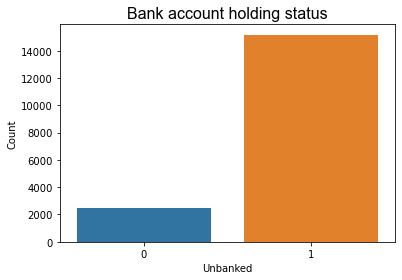

In [4]:
sns.countplot(x='no_acc', data=df_train)
plt.title('Bank account holding status',family='arial',fontsize=16)
plt.xlabel('Unbanked')
plt.ylabel('Count')
plt.show;
#plt.savefig("bank_status.svg")

In [5]:
count_no_acc = len(df_train[df_train['no_acc']==1])
count_acc = len(df_train[df_train['no_acc']==0])
pct_of_no_acc = count_no_acc/(count_no_acc+count_acc)
print("percentage of no account:", round(pct_of_no_acc*100,2))
pct_of_acc = count_acc/(count_no_acc+count_acc)
print("percentage of account", round(pct_of_acc*100,2))

percentage of no account: 85.95
percentage of account 14.05


Classes are very __imbalanced__.

In [6]:
def calculate_pct(feature1,label1,label2,feature2,title):
    df1 = df_train[(df_train[feature1]== label1) & (df_train[feature2]== 0)]
    df1_acc = len(df1)
    df2 = df_train[(df_train[feature1]== label2) & (df_train[feature2]== 1)]
    df2_no_acc = len(df2)
    print(title)
    pct_no_acc = df2_no_acc / (df1_acc + df2_no_acc)
    print("Percentage of unbanked:", round(pct_no_acc*100,2))
    pct_acc = 1-pct_no_acc
    print("Percentage of banked:", round(pct_acc*100,2))

## By country

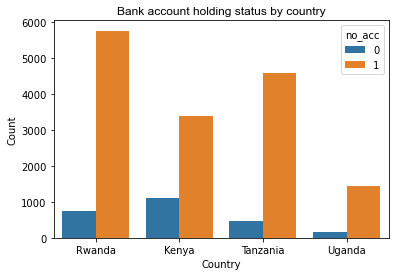

In [7]:
bank_country = sns.countplot(
        data=df_train,
        x="country", hue="no_acc")
plt.title('Bank account holding status by country',family='arial',fontsize=12)
plt.xlabel('Country')
plt.ylabel('Count');

In [13]:
calculate_pct('country','Rwanda','Rwanda','no_acc','Rwanda')
print('\n')
calculate_pct('country','Kenya','Kenya','no_acc','Kenya')
print('\n')
calculate_pct('country','Tanzania','Tanzania','no_acc','Tanzania')
print('\n')
calculate_pct('country','Uganda','Uganda','no_acc','Uganda')

Rwanda
Percentage of unbanked: 88.65
Percentage of banked: 11.35


Kenya
Percentage of unbanked: 75.08
Percentage of banked: 24.92


Tanzania
Percentage of unbanked: 90.71
Percentage of banked: 9.29


Uganda
Percentage of unbanked: 90.66
Percentage of banked: 9.34


## By gender

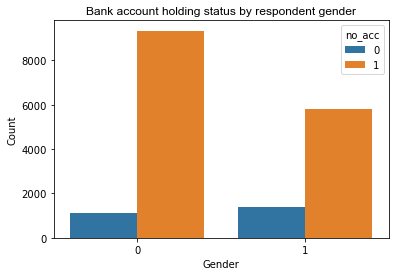

In [13]:
bank_gender = sns.countplot(
        data=df_train,
        x="is_male", hue="no_acc")
plt.title('Bank account holding status by respondent gender',family='arial',fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Count');

Majority of respondents in the sample identified as female; lower percentage of females have an account in comparison to male respondents

In [14]:
calculate_pct('is_male',1,1,'no_acc','Male')
print('\n')
calculate_pct('is_male',0,0,'no_acc','Female')

Male
Percentage of unbanked: 80.93
Percentage of banked: 19.07


Female
Percentage of unbanked: 89.42
Percentage of banked: 10.58


## By location type

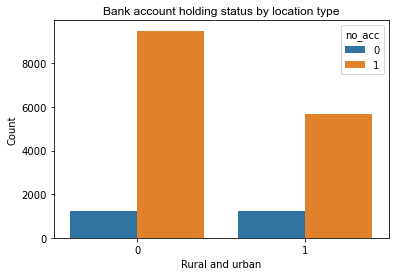

In [16]:
bank_urban = sns.countplot(
        data=df_train,
        x="is_urban", hue="no_acc")
plt.title('Bank account holding status by location type',family='arial',fontsize=12)
plt.xlabel('Rural and urban')
plt.ylabel('Count');

In [15]:
calculate_pct('is_urban',1,1,'no_acc','Urban')
print('\n')
calculate_pct('is_urban',0,0,'no_acc','Rural')

Urban
Percentage of unbanked: 82.05
Percentage of banked: 17.95


Rural
Percentage of unbanked: 88.47
Percentage of banked: 11.53


## By education level

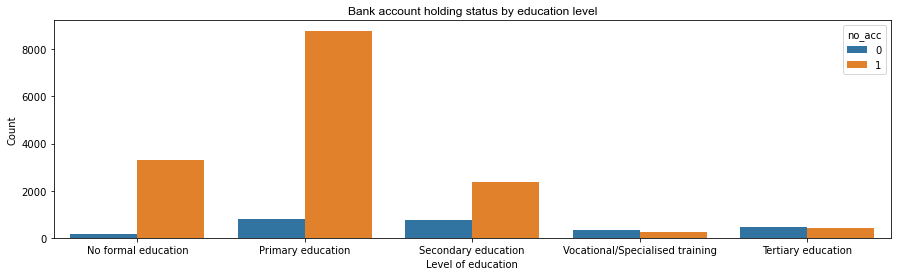

In [19]:
plt.figure(figsize=[15,4])
bank_education = sns.countplot(
        data=df_train,
        x="education_level", hue="no_acc")
plt.title('Bank account holding status by education level',family='arial',fontsize=12)
plt.xlabel('Level of education')
plt.ylabel('Count');

In [16]:
calculate_pct('education_level','No formal education','No formal education','no_acc','No formal education')
print('\n')
calculate_pct('education_level','Primary education','Primary education','no_acc','Primary education')
print('\n')
calculate_pct('education_level','Secondary education','Secondary education','no_acc','Secondary education')
print('\n')
calculate_pct('education_level','Vocational/Specialised training','Vocational/Specialised training','no_acc','Vocational/Specialised training')
print('\n')
calculate_pct('education_level','Tertiary education','Tertiary education','no_acc','Tertiary education')

No formal education
Percentage of unbanked: 95.8
Percentage of banked: 4.2


Primary education
Percentage of unbanked: 91.5
Percentage of banked: 8.5


Secondary education
Percentage of unbanked: 76.42
Percentage of banked: 23.58


Vocational/Specialised training
Percentage of unbanked: 44.43
Percentage of banked: 55.57


Tertiary education
Percentage of unbanked: 49.32
Percentage of banked: 50.68


## By relationship with head of household

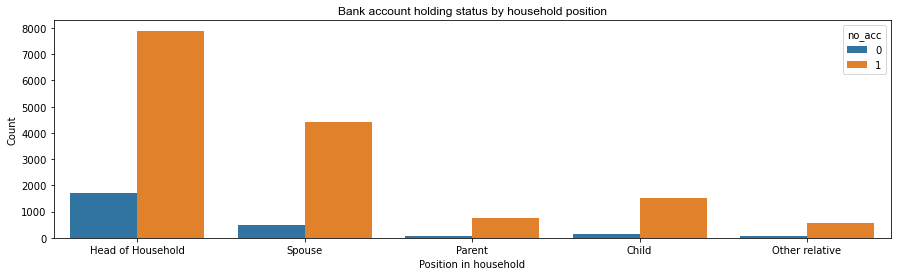

In [25]:
plt.figure(figsize=[15,4])
bank_education = sns.countplot(
        data=df_train,
        x="relationship_with_head", hue="no_acc")
plt.title('Bank account holding status by household position',family='arial',fontsize=12)
plt.xlabel('Position in household')
plt.ylabel('Count');

In [17]:
calculate_pct('relationship_with_head','Head of Household','Head of Household','no_acc','Head of Household')
print('\n')
calculate_pct('relationship_with_head','Spouse','Spouse','no_acc','Spouse')
print('\n')
calculate_pct('relationship_with_head','Parent','Parent','no_acc','Parent')
print('\n')
calculate_pct('relationship_with_head','Child','Child','no_acc','Child')
print('\n')
calculate_pct('relationship_with_head','Other relative','Other relative','no_acc','Other relative')

Head of Household
Percentage of unbanked: 82.16
Percentage of banked: 17.84


Spouse
Percentage of unbanked: 89.99
Percentage of banked: 10.01


Parent
Percentage of unbanked: 93.41
Percentage of banked: 6.59


Child
Percentage of unbanked: 90.99
Percentage of banked: 9.01


Other relative
Percentage of unbanked: 89.47
Percentage of banked: 10.53


## By marital status

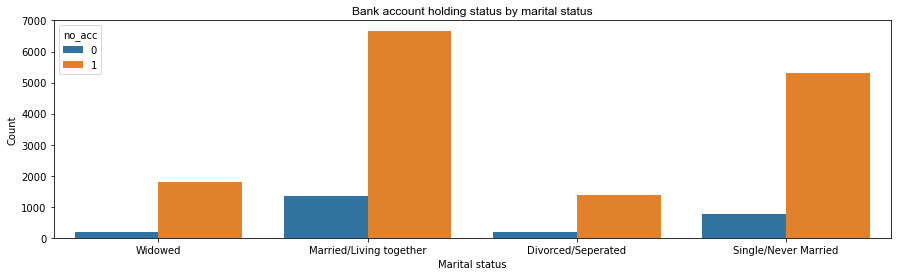

In [31]:
plt.figure(figsize=[15,4])
bank_education = sns.countplot(
        data=df_train,
        x="marital_status", hue="no_acc")
plt.title('Bank account holding status by marital status',family='arial',fontsize=12)
plt.xlabel('Marital status')
plt.ylabel('Count');

In [18]:
calculate_pct('marital_status','Widowed','Widowed','no_acc','Widowed')
print('\n')
calculate_pct('marital_status','Married/Living together','Married/Living together','no_acc','Married/Living together')
print('\n')
calculate_pct('marital_status','Divorced/Seperated','Divorced/Seperated','no_acc','Divorced/Seperated')
print('\n')
calculate_pct('marital_status','Single/Never Married','Single/Never Married','no_acc','Single/Never married')

Widowed
Percentage of unbanked: 90.45
Percentage of banked: 9.55


Married/Living together
Percentage of unbanked: 83.18
Percentage of banked: 16.82


Divorced/Seperated
Percentage of unbanked: 87.94
Percentage of banked: 12.06


Single/Never married
Percentage of unbanked: 87.64
Percentage of banked: 12.36


## By job type

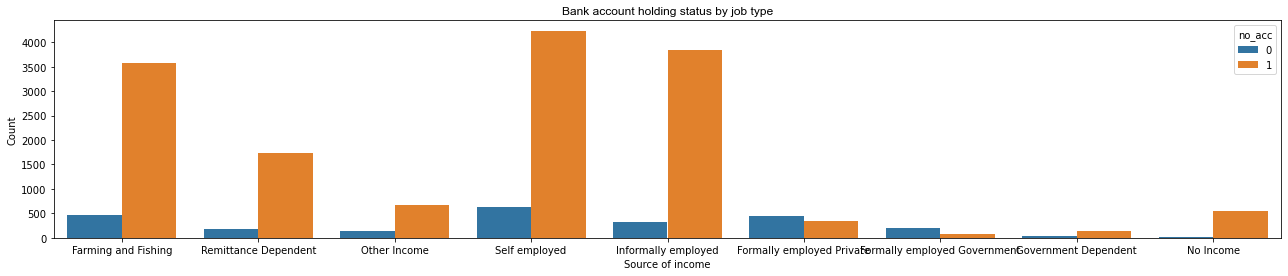

In [36]:
plt.figure(figsize=[22,4])
bank_education = sns.countplot(
        data=df_train,
        x="job_type", hue="no_acc")
plt.title('Bank account holding status by job type',family='arial',fontsize=12)
plt.xlabel('Source of income')
plt.ylabel('Count');

In [19]:
calculate_pct('job_type','Farming and Fishing','Farming and Fishing','no_acc','Farming and fishing')
print('\n')
calculate_pct('job_type','Remittance Dependent','Remittance Dependent','no_acc','Remittance dependent')
print('\n')
calculate_pct('job_type','Other Income','Other Income','no_acc','Other income')
print('\n')
calculate_pct('job_type','Self employed','Self employed','no_acc','Self employed')
print('\n')
calculate_pct('job_type','Informally employed','Informally employed','no_acc','Informally employed')
print('\n')
calculate_pct('job_type','Formally employed Private','Formerly employed Private','no_acc','Formerly employed Private')
print('\n')
calculate_pct('job_type','Formally employed Government','Formerly employed Government','no_acc','Formerly employed Government')
print('\n')
calculate_pct('job_type','Government Dependent','Government Dependent','no_acc','Government Dependent')
print('\n')
calculate_pct('job_type','No Income','No Income','no_acc','No Income')
print('\n')

Farming and fishing
Percentage of unbanked: 88.36
Percentage of banked: 11.64


Remittance dependent
Percentage of unbanked: 90.67
Percentage of banked: 9.33


Other income
Percentage of unbanked: 82.16
Percentage of banked: 17.84


Self employed
Percentage of unbanked: 86.91
Percentage of banked: 13.09


Informally employed
Percentage of unbanked: 92.06
Percentage of banked: 7.94


Formerly employed Private
Percentage of unbanked: 0.0
Percentage of banked: 100.0


Formerly employed Government
Percentage of unbanked: 0.0
Percentage of banked: 100.0


Government Dependent
Percentage of unbanked: 78.8
Percentage of banked: 21.2


No Income
Percentage of unbanked: 96.28
Percentage of banked: 3.72




## By cellphone access

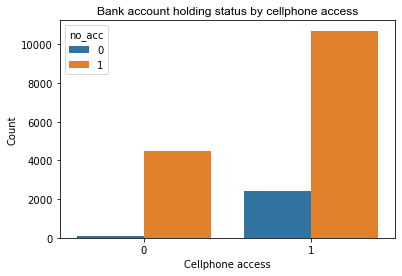

In [46]:
bank_cell = sns.countplot(
        data=df_train,
        x="cellphone", hue="no_acc")
plt.title('Bank account holding status by cellphone access',family='arial',fontsize=12)
plt.xlabel('Cellphone access')
plt.ylabel('Count');

In [20]:
calculate_pct('cellphone',0,0,'no_acc','Does not own a cellphone')
print('\n')
calculate_pct('cellphone',1,1,'no_acc','Owns a cellphone')

Does not own a cellphone
Percentage of unbanked: 98.11
Percentage of banked: 1.89


Owns a cellphone
Percentage of unbanked: 81.72
Percentage of banked: 18.28


In [49]:
#df_train.to_excel('bank_train1.xlsx')